In [1]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

## Feature Detection Algorithms - Mini Documentation

Main Algorithms for detecting and extracting features :
* Harris: This algorithm is useful to detect corners
* Shi-Tomasi : This algorithm is useful to detect corners
* FAST: This algorithm is useful to detect corners

* SIFT: This algorithm is useful to detect blobs
* SURF: This algorithm is useful to detect blobs
* BRIEF: This algorithm is useful to detect blobs
* ORB: This algorithm stands for Oriented FAST and Rotated BRIEF

 blob : an area of an image that greatly differs 
from its surrounding area <br><br> 

Matching features methods :
* Brute-Force matching
* FLANN-based matching

<br><br><br><br>

## 1. Harris Corner Detection

Corners are regions in the image with large variation in intensity in all the directions. <br>
Harris Corner Detection algorithm simply finds the difference in intensity for a displacement of (u,v) in all directions

cv2.cornerHarris use Harris  corner detection algorithm , this algorithm uses image gradient approach :
term "image gradient" refers to the representation of intensity changes in an image, typically expressed as the derivatives of pixel values in both the x and y directions. These derivatives indicate the magnitude of change in intensity of a pixel along the x or y direction.
<br><br>
Harris corner detection algorithm returns all pixels that exists in image with values , you can filter them (threshold) with taking maximum among that values and multiply that values with some constant , and treshold with that value . therefore you are going to obtain corner points and they will change with respect of constant value that you decide

<br>Shortcomings :
* if image is rotated there is no problem for corner detection but if image is scaled Harris Corner Detection can not work properly ,so  if scale of image is important you need to use other algorihtms for example  SIFT

### Parameters
img - Input image. It should be grayscale and float32 type.<BR>
blockSize - It is the size of neighbourhood considered for corner detectio<BR>n
ksize - Aperture parameter of the Sobel derivative use , defines how sensitive corner detection is <br>
k - Harris detector free parameter in the equation.

In [2]:
filename =r"C:\Users\sirom\opencv-tutorials\images\boxes.jpg"
image = cv2.imread(filename)
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
image_rgb=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

In [3]:
dst = cv2.cornerHarris(gray,2,3,0.01) # 3 is Aperture parameter of the Sobel derivative use , if you increase it there is gonna be less circle 
dst.shape # value for all pixel 

(408, 612)

In [4]:
# implement  Harris Corner Detection
max_val=dst.max()

row_num=0
for row in dst:
    col_num=0
    for col in row:
        if col > max_val*0.1:
            # you can reach pixels like this 
            
            print(row_num)
            print(col_num)
            print(dst[row_num][col_num])
            
            cv2.circle(image_rgb,(col_num,row_num),4,(255,0,0),4)
            print("\n")
            
        col_num+=1
    row_num+=1

66
169
0.0041825413


102
466
0.019442549


102
467
0.010185052


103
466
0.02755985


103
467
0.024653872


152
360
0.0053327074


152
361
0.0035494282


152
362
0.003978983


157
466
0.0030389638


157
467
0.004577225


160
147
0.0038042553


160
148
0.006012175


163
537
0.006404335


164
536
0.006947592


164
537
0.028983822


164
538
0.0073895575


165
537
0.0032138862


167
105
0.003355395


168
105
0.0032861007


168
207
0.0037292424


169
205
0.0031199881


170
205
0.009087203


170
206
0.0073472103


172
489
0.004442988


248
429
0.0036119472


250
296
0.0035506443


252
536
0.0049930657


252
537
0.015017005


259
389
0.010528557


259
390
0.010912734


261
388
0.0039684866


261
389
0.0036796045


265
105
0.0055088415


265
295
0.008038508


266
295
0.003260128


267
574
0.004945164


267
575
0.0041462993


268
574
0.003110366


268
575
0.0037688506


279
147
0.0030350182


279
148
0.0042306203


279
233
0.005737427


280
233
0.0040841773


361
574
0.004104102


362
573
0.00

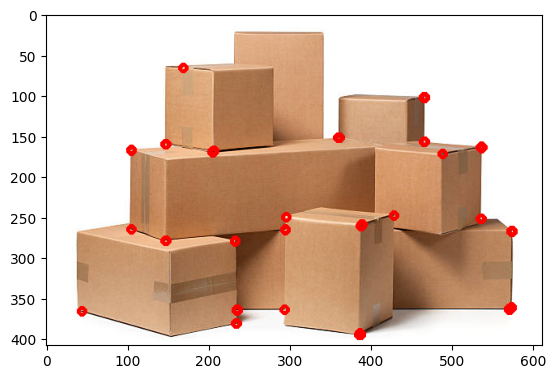

In [5]:
plt.imshow(image_rgb)

<br><br><br><br>

## Shi-Tomasi Corner Detector

It is more efficient than Harris algorithm<br>The Shi-Tomasi Corner Detector modifies the mathematical formulation of the Harris Corner Detector to produce more accurate and reliable results.<br>Particularly, whereas the Harris algorithm tends to find many corner points, Shi-Tomasi provides a method to select only the most prominent corner points that exceed a certain threshold value. This reduces unnecessary computations and makes the algorithm more scalable.<br>
The Shi-Tomasi Corner Detector computes the second moment matrix of pixel intensities in an image and then finds the smallest eigenvalues of this matrix. The smallest eigenvalues determine the likelihood of a pixel region being a corner point. If these eigenvalues exceed a certain threshold value, the pixel region is considered a corner.<br>
moment matrix is  used to analyze the distribution of pixel intensities within an image or a region of interest.

OpenCV has a function, cv.goodFeaturesToTrack(). It finds N strongest corners in the image by Shi-Tomasi method

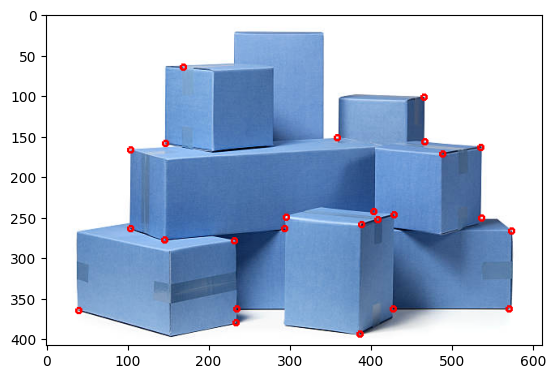

In [72]:

img = cv2.imread(r"C:\Users\sirom\opencv-tutorials\images\boxes.jpg")
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

corners = cv2.goodFeaturesToTrack(gray,25,0.01,5) # 25 best corner ,  qualityLevel and minDistance
corners = np.intp(corners)

for i in corners:
    x,y=i[0][0],i[0][1]
    cv2.circle(img,(x,y),3,255,2)
    
plt.imshow(img);

In [65]:
for i in corners:
    print(i) # coordinates of corners 

[[466 102]]
[[536 164]]
[[537 251]]
[[387 394]]
[[235 363]]
[[232 279]]
[[104 167]]
[[389 259]]
[[147 159]]
[[294 264]]
[[359 152]]
[[467 157]]
[[574 267]]
[[489 172]]
[[571 363]]
[[409 253]]
[[296 250]]
[[ 40 365]]
[[104 264]]
[[428 363]]
[[146 278]]
[[429 247]]
[[169  65]]
[[234 380]]
[[404 243]]


<br><br><br><br><br><br>

## FAST Algorithm

FAST algorithm is used for corner detection  and it is faster than other algorithms<br>
FAST (Features from Accelerated Segment Test)<br>
It is several times faster than other existing corner detectors. But it is not robust to high levels of noise. It is dependant on a threshold.


algorithm is relatively simple . <br>
1. Algorithm choose some random pixel , and around that pixel it draws a circle (radius : 3 pixel ) that contains 16 pixel .
2. If there is 12 continous(among that 16 pixel) points  which  intensity+treshold is darker or brighter than center pixel then that center pixel is considered as interest point (corner)<br>
* For speed up this process , algorithm first check 4 pixel among circles circumferences pixels . 3 pixel must be all darker or all birghter than center pixel , if it is not that point cant be interest point because remember 12 continuous pixel must be darker or brighter


In [32]:
img = cv2.imread(r"C:\Users\sirom\opencv-tutorials\images\boxes.jpg")
gray_image = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

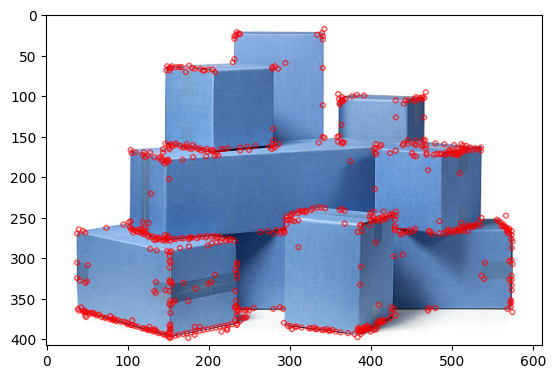

In [33]:
# Initiate FAST object with default values
fast = cv2.FastFeatureDetector_create()

# find and draw the keypoints
keypoints = fast.detect(gray_image,None)
img2 = cv2.drawKeypoints(img, keypoints, None,color=(255,0,0))

plt.imshow(img2)

In [30]:
for point in keypoints:
    print(point.pt)

(343.0, 18.0)
(235.0, 22.0)
(340.0, 23.0)
(237.0, 24.0)
(239.0, 24.0)
(334.0, 25.0)
(234.0, 26.0)
(232.0, 27.0)
(341.0, 27.0)
(232.0, 30.0)
(341.0, 31.0)
(232.0, 55.0)
(230.0, 59.0)
(295.0, 60.0)
(176.0, 63.0)
(149.0, 64.0)
(155.0, 64.0)
(282.0, 64.0)
(160.0, 65.0)
(164.0, 65.0)
(167.0, 65.0)
(279.0, 65.0)
(152.0, 66.0)
(154.0, 66.0)
(180.0, 66.0)
(341.0, 66.0)
(183.0, 67.0)
(190.0, 67.0)
(279.0, 67.0)
(286.0, 67.0)
(200.0, 68.0)
(205.0, 68.0)
(148.0, 69.0)
(152.0, 69.0)
(193.0, 69.0)
(195.0, 69.0)
(172.0, 71.0)
(208.0, 71.0)
(468.0, 96.0)
(360.0, 98.0)
(383.0, 99.0)
(392.0, 100.0)
(377.0, 101.0)
(365.0, 102.0)
(456.0, 102.0)
(464.0, 102.0)
(461.0, 103.0)
(466.0, 103.0)
(361.0, 104.0)
(369.0, 104.0)
(454.0, 104.0)
(365.0, 105.0)
(463.0, 105.0)
(431.0, 106.0)
(443.0, 106.0)
(447.0, 106.0)
(364.0, 107.0)
(366.0, 107.0)
(455.0, 107.0)
(362.0, 109.0)
(441.0, 110.0)
(362.0, 111.0)
(341.0, 112.0)
(431.0, 127.0)
(466.0, 127.0)
(364.0, 136.0)
(280.0, 141.0)
(361.0, 150.0)
(341.0, 151.0)
(359.0

<br><br>

Without nonmaxSuppression

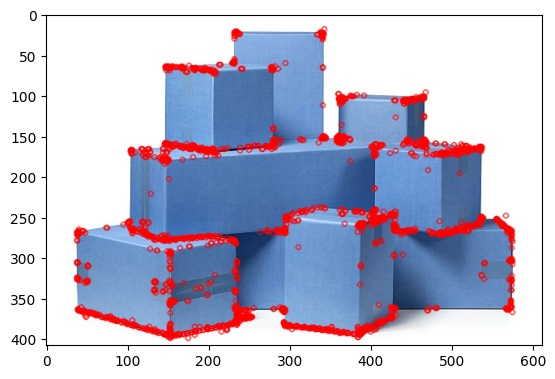

In [20]:
# Disable nonmaxSuppression ,
fast.setNonmaxSuppression(0)
keypoints = fast.detect(gray_image,None)

img3 = cv2.drawKeypoints(img, kp, None, color=(255,0,0))

plt.imshow( img3)

<br><br><br><br><br><br>

## SIFT

SIFT algorithm is used for feature extraction

https://medium.com/@siromermer/object-tracking-with-sift-algorithm-using-opencv-51be3c6882c9

#### Anatomy of keypoint
keypoints, descriptor = sift.detectAndCompute(gray,None)
keypoint class:
* pt : x and y coordinates
* size : diameter of feature
* angle : orientation of the feature
* response :  strength of the keypoint 
* octave : octave property indicates the layer at which the keypoint was detected.
* class_id :  ID of the keypoint 

<br><br><br><br><br><br>

## SURF / Speeded-Up Robust Feature (SURF)

SURF was created as an improvement on SIFT in 2006, aimed at increasing the speed of the algorithm.

Rather than using Difference of Gaussian to approximate LoG, SURF utalises Box Filters. The benefit of this is that box filters can be easily calculated and calculations for different scales can be done simultaneously

<br><br><br><br><br>

## ORB

ORB = FAST + BRIEF<br>
ORB : Oriented FAST and Rotated BRIEF

 Why ORB ? <br>
* SIFT and SURF are are patented , so you cannot use them in commercial applications for free <br>
* ORB is compeletly  free<br>

ORB is basically a fusion of FAST keypoint detector and BRIEF descriptor with many modifications to enhance the performance. 

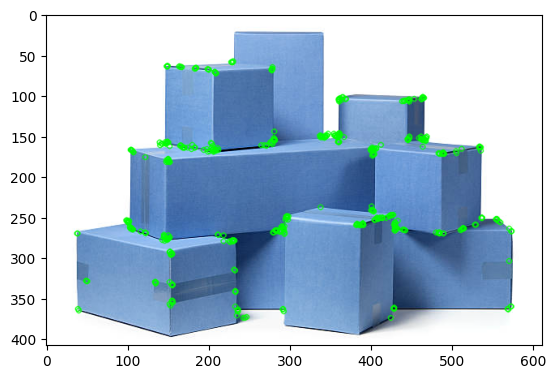

In [57]:
img = cv2.imread(r"C:\Users\sirom\opencv-tutorials\images\boxes.jpg")
gray_image = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# Initiate STAR detector
orb = cv2.ORB_create()

# find the keypoints with ORB
keypoints, descriptors = orb.detectAndCompute(gray_image, None)

# draw only keypoints location,not size and orientation
img2 = cv2.drawKeypoints(img,keypoints,None,color=(0,255,0), flags=0)
plt.imshow(img2)

<br><br><br><br><br><br><br>

Based on the tests, ORB has the best performance across the board with fast computation and is shown to be robust to illumination and rotational change. There may be other situations where SIFT or SURF would be needed, but for most use-cases it would seem that ORB is the best feature extraction method of the three.

<BR><BR><BR><BR>

## BRIEF

Binary Robust Independent Elementary Features (BRIEF)

OpenCV's SIFT and SURF classes are both detectors 
and descriptors

BRIEF is a type of Keypoint(feature) descriptor , it isnt feature detector like FAST<br>
you need to extract features with different algorithms like FAST<br>
* fast and efficient

Keypoint descriptors are a representation of the image that serves as the gateway to
feature matching because you can compare the keypoint descriptors of two images
and find commonalities.

In [44]:
img = cv2.imread(r"C:\Users\sirom\opencv-tutorials\images\boxes.jpg")
gray_image = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [48]:
# Initiate FAST object with default values
fast = cv2.FastFeatureDetector_create()

brief =cv2.BRISK_create()

# find the keypoints with STAR
keypoints = fast.detect(gray_image,None)

# compute the descriptors with BRIEF
keypoints, descriptors = brief.compute(gray_image, keypoints)

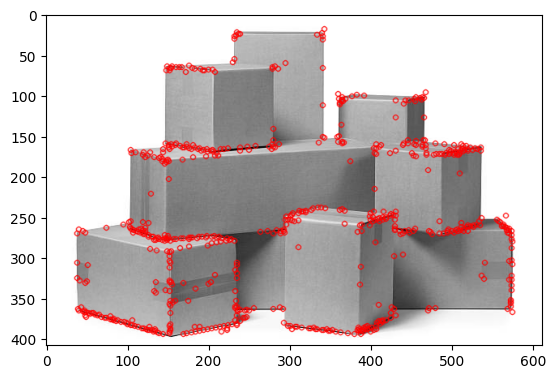

In [46]:
brief_img = cv2.drawKeypoints(gray_image, keypoints, None, color=(255,0,0))

plt.imshow( brief_img)

In [50]:
descriptors[0]

array([255, 255, 255, 255, 247,  99,   0, 128, 193, 195,  15, 255, 243,
       255, 255, 247, 159, 127, 252, 241, 143, 255,  56,  14, 128,   0,
         0, 192,  56, 103, 252, 231,  27,  45,  48, 128,   0,   0, 128,
         0, 134,  24, 147,  57,   0,   2,   0, 152, 219, 239, 127,  95,
       135, 195, 197, 199, 225, 112, 120, 248,  62,  15,  25,   0],
      dtype=uint8)

<BR><BR><BR><BR><BR><BR><BR><BR><BR>

## FLANN-based matching